# Netflix EDA | CPSC 222, Spring 2022 | Matt Nguyen

___
## Introduction

For this project, I will be examining my Netflix watch data from November 11th, 2017 to April 18th 2022. Albeit this is 5 years of data, I only began watching Netflix consistently during 2020, right after COVID-19 caused initial shutdowns.  

This data is in **CSV** format and has **541 instances** on **8 attributes**: Title, Date Viewed, Year Released, Genres, Keywords,Duration, Type, Maturity Rating.

I downloaded the data directly from [Netflix](https://help.netflix.com/en/node/101917). It initially had the Title and Date Attributes, with the rest being added manually. To make this project more interesting, I decided to merge a days of week dataset generated from excel, which provided me the day of week for each instance in my netflix data.  

Netflix data is important and interesting to me because throughout the pandemic watching Netflix gave me something enjoyable to do/look forward to, and so, I'd like to further explore the numbers behind my watching during that time , and see if I can create something unique which presents that in a clear, concise way. 

* What are you trying to classify in the dataset
* What are potential impacts of the results
* Who are stakeholders interested in your results

___

## Importing Libraries
* to start, we will import all needed libraries for this project
* also importing a final_utils file for utility functions (where the rest of the libraries are)

In [376]:
%%capture
from importlib import reload
import final_utils as utils
reload(utils)


---
## Data Analysis

### Loading & Cleaning the Data

Utilizing the pandas library, I will be loading the data into two separate dataframes. 

### Cleaning
For cleaning, I will be dropping duplicates on the days of week dataset and merging it on the "Date Viewed" attribute with the Netflix data. Next, I will be cleaning the "Title" column by removing the season & episode number. I noticed the format of all titles was "Title: Season: Episode" so I decided to split the titles at the ":" character, and then replacing them with what came before. For one series, "Avatar: The Last Airbender" removing the title after the ":" would cause ambiguity, so I wrote a special case in the function to account for that. Lastly, I outputted the merged and cleaned dataset to csv. 

### Challenges? 
I had limited challenges with this portion of the project, but it did take a significant amount of time to manually add columns into the netflix dataframe. Further, I also experience trouble merging the two dataframe until I realized I needed to drop duplicates in the days of week dataset to successfully merge.  

In [377]:
# loading
netflix_df = utils.load_data("NetflixData.csv")
days_df = utils.load_data("days_of_week.csv")
days_df = days_df.drop_duplicates()

# merging 
netflix_merged_df = netflix_df.merge(days_df, on="Date Viewed")

# cleaning
title_col_ser = netflix_merged_df["Title"]
cleaned_title_col_ser = title_col_ser.copy()
netflix_merged_df["Title"] = utils.clean_titles(title_col_ser, cleaned_title_col_ser)

# to csv
netflix_merged_df.to_csv("NetflixMerged.csv", index=False)
print(netflix_merged_df)

                      Title Date Viewed  Year Released         Genres  \
0    Hunter X Hunter (2011)     4/18/22           2011  Shounen Anime   
1    Hunter X Hunter (2011)     4/18/22           2011  Shounen Anime   
2    Hunter X Hunter (2011)     4/17/22           2011  Shounen Anime   
3    Hunter X Hunter (2011)     4/17/22           2011  Shounen Anime   
4    Hunter X Hunter (2011)     4/17/22           2011  Shounen Anime   
..                      ...         ...            ...            ...   
536         Stranger Things    11/22/17           2016         Sci-Fi   
537         Stranger Things    11/22/17           2016         Sci-Fi   
538         Stranger Things    11/22/17           2016         Sci-Fi   
539         Stranger Things    11/21/17           2016         Sci-Fi   
540         Stranger Things    11/21/17           2016         Sci-Fi   

     Keywords  Duration       Type Maturity Rating    Weekday  
0    Exciting        23  TV Series           TV-14     Mond

### Aggregation
For this section, I am going to be grabbing some numeric columns within the data and computing basic statistics, such as, mean, sum, mode. Further, I will also be using the groupby method to find the ratio between TV Series, movies, documentary's, etc. that I watched in the past five years. 


In [378]:
# getting series to compute stats on
duration_col_ser = netflix_merged_df["Duration"]
release_col_ser = netflix_merged_df["Year Released"]

# basic stats
utils.stats(duration_col_ser, release_col_ser, netflix_merged_df)

# ratio stats
ratio_df = utils.type_stats(netflix_merged_df, "Type")

type_df = utils.type_stats(netflix_merged_df, "Maturity Rating")


Average Duration                 26.10536
Most Frequent Duration           23.00000
Most Frequent Release Year     2015.00000
Average Release Year           2012.74100
Total Minutes Watched         14123.00000
Number Watched                  541.00000
dtype: float64

              Type
Type              
Documentary  0.004
Docuseries   0.015
Movie        0.011
TV Series    0.970

                 Maturity Rating
Maturity Rating                 
PG-13                      0.004
TV-14                      0.675
TV-G                       0.004
TV-MA                      0.274
TV-PG                      0.002
TV-Y7                      0.043



---
### Visualizations

For visualizations, first, I decided to create a pie chart of the ratio between the "Types" of content I've watched. This highlights the overwhelming amount of TV Series I've watched in comparison to other types. For the second visualization, I created a barh graph which shows the relationship between the titles and the amount of minutes watched on each series. This one was significantly more challenging to make than the pie chart because it required me to grab columns from a grouby object which is something I am unfamiliar with, however, after a little trial and error, I figured it out and was able to elegantly present the data. 

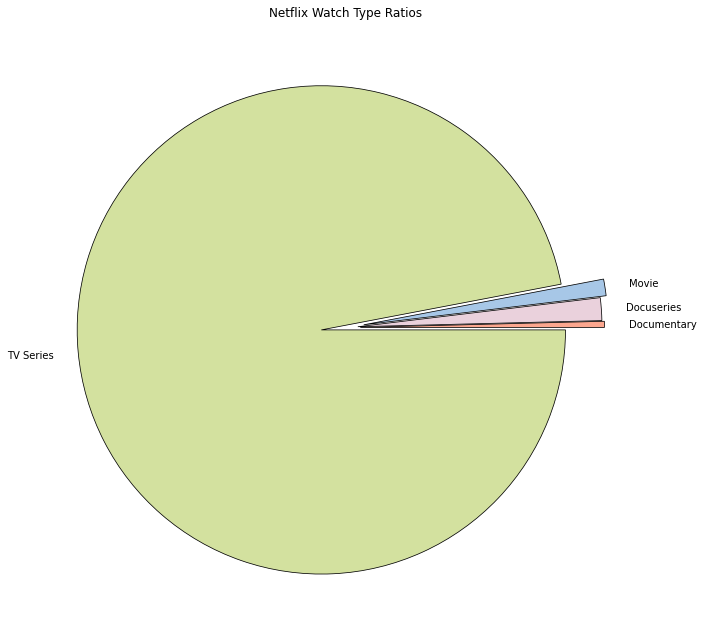

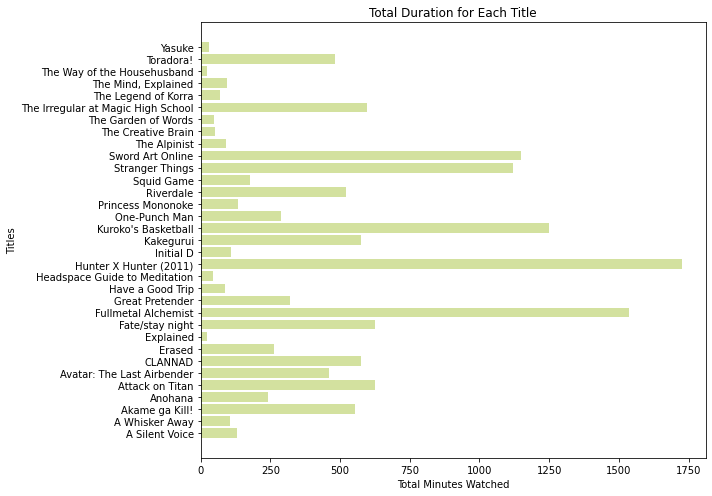

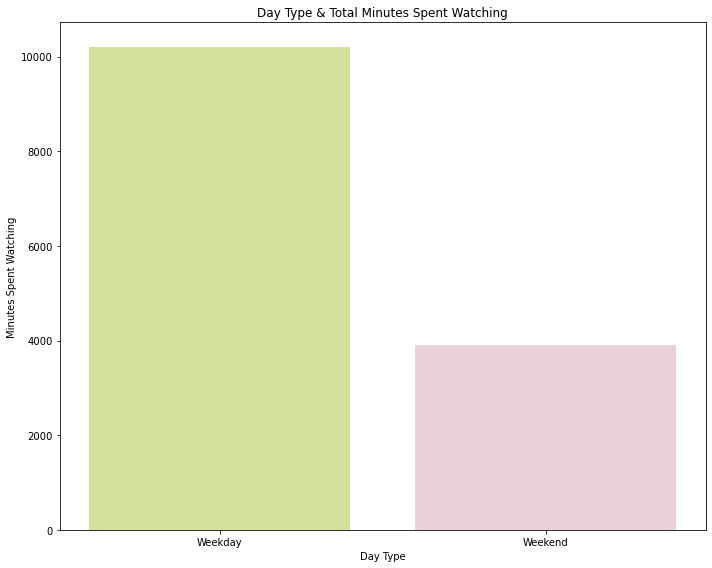

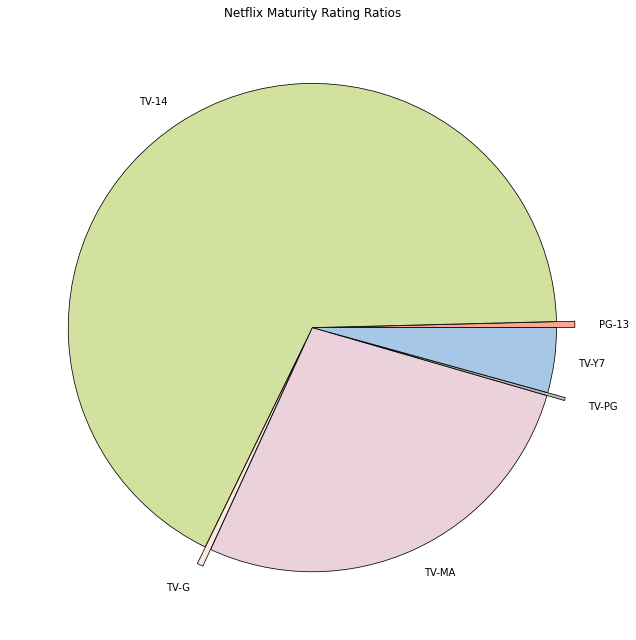

In [379]:
utils.pie_chart(ratio_df)
utils.barh_chart(netflix_merged_df)
utils.bar_chart(netflix_merged_df)
utils.pie_chart1(type_df)

### Visualization Interpretations

* **Visualization 1**
    * It's clear to see I significantly prefer TV Series over any other type of content
    * Although it's very slim, I watched more docuseries than I expected  
    
* **Visualization 2**
    * my most minutes spent were watching Hunter X Hunter. This makes sense because of the fact that it has 148 episodes (although I don't remember if all of them were on netflix)
    * I clearly watch anime titles more than anything else

* **Visualization 3**
    * this bar chart is pretty simple and expected, it shows that I've watched significantly more total minutes on weekdays than weekends
    * this makes sense because there are much more weekdays than weekends within the dataset, so I'd expect I have more total minutes 

* **Visualization 4**
    * my most watched rating is TV-14, which makes sense as most anime are rated TV-14
    * I watched less PG-13 ratings than expected
    * although it's small, I watched a some TV-PG, mostly from Avatar: TLA I would assume

---
### Hypothesis Testing

#### Test 1
Looking at 2020 (the time in which I watched the most Netflix), I'd like to examine is if how the summer months affected my watch time per day. Specifically, I'd like to look at how July-August potentially differed in view time to September-October. Just to be extra clear, I think my average viewing per day will be larger will be greater in the summer months than in the fall months due to not being in school at the time and remembering binge watching Netflix regularly. 

Below I am collecting the necessary data using the groupby method. While it's debatable over whether to use an independent or dependant ttest, I decided to go with an independent because of the way the data is structured. In the initial dataframes, I ensure to grab the same number of instances- 59. However, because I was more busy with activities in the summer, I had significantly less actual days watched. By this I mean, in the summer, there were some days when I did not watch anything, while others, I binged the whole day. In contrast to this, in the fall, I watched nearly every day but less. So after summing the duration by day, there were more instances in fall than in summer, making a dependant ttest not possible. 

Loading the necessary data:

In [380]:
summer_df = netflix_merged_df.loc[264:322]
fall_df = netflix_merged_df.loc[200:258]

summer_group_df = summer_df.groupby(['Date Viewed'], as_index=False)['Duration'].sum()
fall_group_df  = fall_df.groupby(['Date Viewed'], as_index=False)['Duration'].sum()

Let "S" represent summer months & "F" represent fall months

1. $H_{0} : \mu_{S} \le \mu_{F}$  
   $H_{1} : \mu_{S} > \mu_{F}$
2. $\alpha = 0.05$
3. Independent two-sample, one-tailed t-test
4. $t = 1.697$ (significance level of 0.05, 34 degrees of freedom, using 30 ) 
    * If $t > 1.697$, reject $H_{0}$
    * If $t < 1.697$, fail to reject $H_{0}$
5. Calculations are below: 

In [381]:
utils.ind_t_test(summer_group_df, fall_group_df)

t-computed: 2.863392037375321 
p-value: 0.0035649181280207483


##### Hypothesis Test Results
Since the p-value is less than alpha we reject null. This indicates that although there were less total days watched over the summer months, on the days that I did, I watched more on average than in the fall months. This is inline with what I expected because I did not have the responsibility of school and homework over the summer, so I was able to binge watch all day, as opposed to in the fall I could only watch an episode or two. 

#### Test 2
Since I merged my Netflix data with a days of the week dataset, I'd like to see if I spent more minutes on average watching on the weekend or the weekdays. Similar to test 1, contrary to intuition, I'd imagine I watched more on weekdays because during online school, I had more free time on weekdays due to assignments typically being due Monday. 

Loading the necessary data: 

In [382]:
test_df = netflix_merged_df

weekday_df = test_df[~test_df['Weekday'].isin(['Saturday', 'Sunday'])]
weekend_df = test_df[~test_df['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_group_df = weekday_df.groupby(['Date Viewed'], as_index=False)['Duration'].sum()
weekend_group_df = weekend_df.groupby(['Date Viewed'], as_index=False)['Duration'].sum()

weekday_group_df = weekday_group_df.loc[0:40]

Let "Wk" represent weekdays & "Wknd" represent the weekend. 

1. $H_{0} : \mu_{Wk} \le \mu_{Wknd}$  
   $H_{1} : \mu_{Wk} > \mu_{Wknd}$
2. $\alpha = 0.05$
3. Dependant two-sample, one-tailed t-test
4. $t = 1.658$ (significance level of 0.05, 122 degrees of freedom, using 120) 
    * If $t > 1.658$, reject $H_{0}$
    * If $t < 1.658$, fail to reject $H_{0}$
5. Calculations are below: 

In [383]:
utils.dep_t_test(weekday_group_df, weekend_group_df, 'Duration')

t-computed: -0.9388067140688013 
p-value: 0.17673231812525475


##### Hypothesis Test Results
Since the p-value is greater than alpha we fail to reject the null. This doesn't necessarily mean that I watched more minutes on average on weekends, but it does mean that I did not watch more minutes on average on weekdays than I did on weekends. This goes against what I initially believed which leads me to thinking my homework load throughout weekends in 2020 was not as bad as I am remembering it. Note, the above graph of minutes distributions on weekends vs weekdays shows significantly more total minutes on weekdays, however, this is because there are more weekdays than weekends. For this ttest, I took an equivalent number of weekends and weekdays and summed the total minutes watched before running the test to make it even. 

#### Test 3

For my final hypothesis test, I am going to examine if the average year watched decreased from the beggining of my watching on Netflix, to now. I would assume it has, because I remember watching new shows during 8th/9th grade, but as time went on, I got into anime and began exploring older titles. To do this test, I am simply going to divide the entire dataframe in half, and the first half will be consider "first" with the second being considered "second" 

Loading the data:

In [384]:
first_df = netflix_merged_df.loc[271:541]
second_df = netflix_merged_df.loc[1:270]

Let "f" represent my earliest watching & "s" represent my latest watching. 

1. $H_{0} : \mu_{s} \le \mu_{f}$  
   $H_{1} : \mu_{s} > \mu_{f}$
2. $\alpha = 0.05$
3. Dependant two-sample, one-tailed t-test
4. $t = 1.645$ (significance level of 0.05, infinite degrees of freedom) 
    * If $t < 1.645$, reject $H_{0}$
    * If $t > 1.645$, fail to reject $H_{0}$
5. Calculations are below: 

In [385]:
utils.dep_t_test(second_df, first_df, 'Year Released')

t-computed: 9.468237023413268 
p-value: 7.601008608577329e-19


##### Hypothesis Test Results
Since the p-value is significantly less than alpha, reject null. This means that at a significance level of 0.05, my hypothesis of watching older things during my latest watching is incorrect and it turns out that I actually watched older things during my earliest watching. I suppose this means I should check out some more older titles in the future. 

---
## Classification
For the final section of this project, I will be developing two classification models: kNN & DecisionTree to predict attributes for unseen instances.

#### kNN
* the kNN classifiers involves normalizing values such that no attribute carries more weight than another, computing the distance from each training instance to the test instance, and then finding the k closest neighbors and making a prediction based on the majority class labels.

* similar to DA7, we need to perform label encoding on categorical attributes before making use of kNN. We will be using the sklearn.preprocessing.LabelEncoder to do this. Further, we will be encoding labels on the Weekday, Maturity Rating, Type, Keywords, Genre, and Title Columns. 

* I will be dropping date viewed since it cannot be converted into a float and that column is not valuable to classification

* I will be using the 3 nearest neighbors and reserving 25% of the data for testing.

The code for this is below:

In [386]:
utils.label_encoder(netflix_merged_df, 'Weekday')
utils.label_encoder(netflix_merged_df, 'Maturity Rating')
utils.label_encoder(netflix_merged_df, 'Type')
utils.label_encoder(netflix_merged_df, 'Keywords')
utils.label_encoder(netflix_merged_df, 'Genres')
utils.label_encoder(netflix_merged_df, 'Title')

netflix_merged_df.drop('Date Viewed',axis=1, inplace=True)

Now that we've successfully encoded the labels, we can begin kNN classification.

In [387]:
utils.kNN(netflix_merged_df, 'Weekday')

accuracy =  0.2867647058823529


In [388]:
utils.kNN(netflix_merged_df, 'Type')

accuracy =  0.9926470588235294


##### kNN Results:
For the kNN classifier, I attempted to predicted what day of the week & what type unseen instances are (in two separate classification tasks). For these two tasks, we see **very** different accuracy levels, so I would like to explore those further and see if we can make sense of what happened. 

* Type Classification: 

### Decision Tree Classifier
* Decision Trees allow us to create a training model that can use to predict the class or value of the target variable by learning simple decision rules derived from our training data
* We can use the same train/test splits as our kNN classifier for our decision tree classifier. 

The code is below:

In [389]:
utils.tree(netflix_merged_df, 'Weekday')

accuracy =  0.25735294117647056


In [390]:
utils.tree(netflix_merged_df, 'Type')

accuracy =  0.9926470588235294


---
## Conclusion